BASIC SVR (Linear)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import scale
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn import model_selection


In [2]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['League', 'Division', 'NewLeague', 'Salary'], axis=1).astype('float')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear').fit(X_train, y_train)

In [5]:
svr_pred = svr_model.predict(X_train)

In [6]:
svr_pred[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [7]:
print("y = {0} + {1} * x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * x


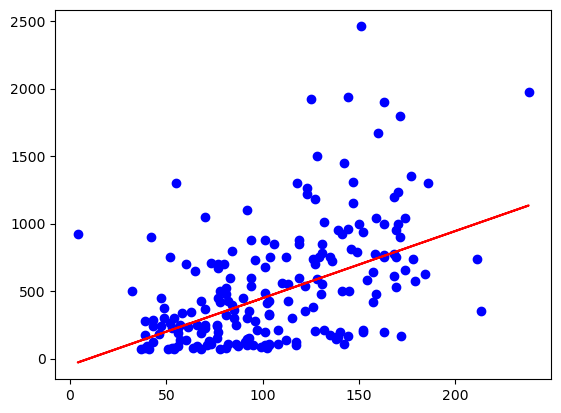

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, svr_pred, color='red')

In [11]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} * x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 * x


Text(0, 0.5, 'Salary')

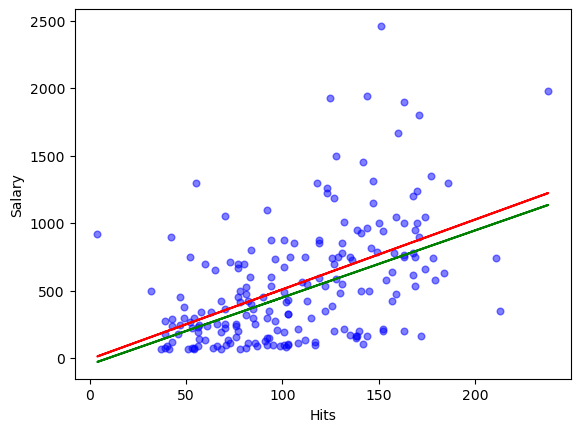

In [12]:
plt.scatter(X_train, y_train, alpha=0.5, s=23, color='blue')
plt.plot(X_train, lm_pred, color='red')
plt.plot(X_train, svr_pred, color='green')

plt.xlabel('Hits')
plt.ylabel('Salary')

Predict

In [13]:
print("y = {0} + {1} * x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 * x


In [14]:
svr_model.predict([[91]])

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([403.52804878])

In [15]:
y_pred_svr = svr_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred_svr))

459.0187960365147

Model Tuning

In [21]:
svr_model

SVR(kernel='linear')

In [34]:
from sklearn.model_selection import GridSearchCV
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [35]:
svr_cv_model.best_params_

{'C': 0.4}

In [36]:
svr_tuned = SVR(kernel='linear', C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9516\3375514184.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  svr_tuned = SVR(kernel='linear', C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [38]:
svr_tuned_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, svr_tuned_pred)) # 0.4 C if not just hits value

367.538528365296

In [ ]:
np.sqrt(mean_squared_error(y_test, svr_tuned_pred)) # 0.1 C if just hits value

458.198966781116

NON-LINEAR SVR

In [17]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [23]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
svr = SVR(kernel='rbf', epsilon=0.1)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred_sim = svr.predict(x_sim[:, np.newaxis])

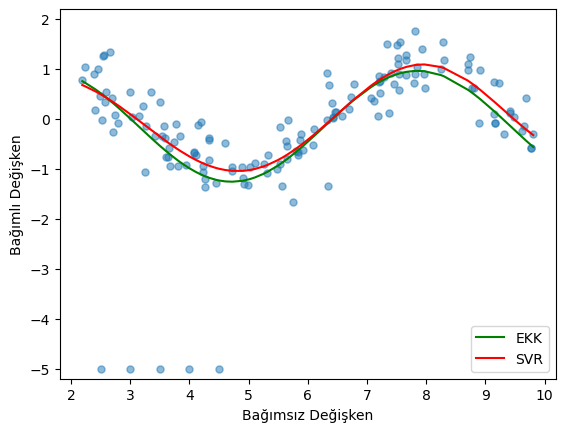

In [24]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred_sim, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [26]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [27]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)

In [28]:
y_pred_rbf = svr_rbf.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test, y_pred_rbf))

460.0032657244849

In [31]:
from sklearn.model_selection import GridSearchCV
svr_params = {"C" : [.1, .4, 5, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv=10).fit(X_train, y_train)

In [32]:
svr_cv_model.best_params_

{'C': 50}

In [33]:
pd.Series(svr_cv_model.best_params_)[0]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22344\2988346359.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Series(svr_cv_model.best_params_)[0]


50

In [34]:
svr_rbf_tuned = SVR(kernel="rbf", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22344\6245052.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  svr_rbf_tuned = SVR(kernel="rbf", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [35]:
np.sqrt(mean_squared_error(y_test, svr_rbf_tuned.predict(X_test)))

428.00406888095694